# Conceituação
* Identificar patamares diários de consumo
* "padrões de consumo"

## The data
* ta_real_mean 
* ta_real_std 
* ampa_real_mean 
* ampa_real_std 
* fi_a_mean 
* fi_a_std 
* freq_mean 
* pa_mean

## Implementações futuras
* identificar quando o consumo está muito alto para seu padrão
* Visualização (usando aquele gráfico de bolas, com tamanho igual a variância oa longo de do) de correlações e coisas do genero dentro do cluster

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [93]:
raw = pd.read_csv ("../datasets/eloDadosMarço.csv", header=0)
raw.head()

,id,uid,blocodef,momento,numserie,ta,tb,tc,ampa,ampb,...,sa,sb,sc,fi_a,fi_b,fi_c,p3,q3,s3,fi_3
0,312703623,1,0,2019-04-01 00:00:00,90008190,11566,11492,11485,262,268,...,20.721004,21.067321,24.864143,0.966290,0.999735,0.986394,65.610085,9.907331,66.652467,0.984361
1,312703636,1,0,2019-04-01 00:00:01,10000,11564,11491,11482,263,268,...,20.872757,21.067321,24.989598,0.965904,0.999735,0.986987,65.887213,9.907331,66.929676,0.984425
2,312703649,1,0,2019-04-01 00:00:02,10000,11566,11494,11485,263,266,...,20.805845,20.999771,24.852847,0.965680,0.999652,0.986842,65.610085,9.976613,66.658464,0.984272
3,312703662,1,0,2019-04-01 00:00:03,2000,11572,11490,11482,264,265,...,20.975872,20.861256,24.899253,0.964458,0.999647,0.987786,65.679367,9.976613,66.736381,0.984161
4,312703675,1,0,2019-04-01 00:00:04,0,11580,11488,11479,263,263,...,20.890802,20.791998,24.751630,0.965069,0.999645,0.988079,65.402238,9.838049,66.434431,0.984463


In [94]:
## Filtering variables
raw = raw[['momento','ta_real','ampa_real', 'pa', 'fi_a', 'freq',]]
raw['momento'] = pd.to_datetime (raw['momento'])
raw = raw.set_index(raw.momento)
raw

,momento,ta_real,ampa_real,pa,fi_a,freq
momento,,,,,,
2019-04-01 00:00:00,2019-04-01 00:00:00,13.8792,2.62,20.022507,0.966290,6000
2019-04-01 00:00:01,2019-04-01 00:00:01,13.8768,2.63,20.161071,0.965904,6000
2019-04-01 00:00:02,2019-04-01 00:00:02,13.8792,2.63,20.091789,0.965680,6000
2019-04-01 00:00:03,2019-04-01 00:00:03,13.8864,2.64,20.230353,0.964458,6000
2019-04-01 00:00:04,2019-04-01 00:00:04,13.8960,2.63,20.161071,0.965069,6000
2019-04-01 00:00:05,2019-04-01 00:00:05,13.9056,2.61,20.091789,0.966511,6000
2019-04-01 00:00:06,2019-04-01 00:00:06,13.9032,2.55,19.745379,0.969539,6000
2019-04-01 00:00:07,2019-04-01 00:00:07,13.8888,2.60,20.022507,0.967937,6000
2019-04-01 00:00:08,2019-04-01 00:00:08,13.8900,2.63,20.091789,0.964841,6006


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f69521a52b0>,
      dtype=object)

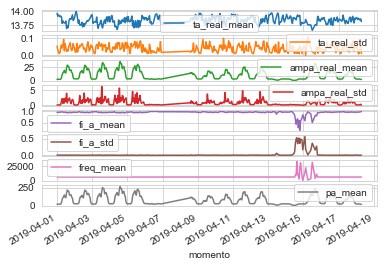

In [95]:
resampled = raw.resample('H').agg({
    'ta_real': ['mean', 'std'],
    'ampa_real': ['mean', 'std'],
    'fi_a': ['mean', 'std'],
    'freq': ['mean'],
    'pa': ['mean']
})
resampled.columns = resampled.columns.map('_'.join)
resampled = resampled.dropna()
resampled.plot(subplots=True)


In [96]:
resampled

,ta_real_mean,ta_real_std,ampa_real_mean,ampa_real_std,fi_a_mean,fi_a_std,freq_mean,pa_mean
momento,,,,,,,,
2019-04-01 00:00:00,13.957135,0.052734,2.714815,0.145278,0.957772,0.008299,5999.365786,20.789890
2019-04-01 01:00:00,13.906930,0.032364,2.727883,0.142303,0.959749,0.007900,6001.439554,20.873075
2019-04-01 02:00:00,13.930359,0.019755,2.690788,0.148259,0.958697,0.007022,6000.111915,20.594894
2019-04-01 03:00:00,13.913774,0.010342,2.699928,0.140350,0.961175,0.007914,6001.525730,20.680504
2019-04-01 04:00:00,13.899181,0.015219,2.674392,0.143775,0.962717,0.006432,5999.846368,20.491034
2019-04-01 05:00:00,13.911397,0.040879,2.987525,0.266829,0.966208,0.008902,5998.682147,23.045813
2019-04-01 06:00:00,13.896494,0.059395,5.403054,1.397383,0.981968,0.010908,6001.734170,42.458754
2019-04-01 07:00:00,13.783532,0.040955,11.241857,2.228884,0.974126,0.006496,6000.615169,86.993478
2019-04-01 08:00:00,13.826011,0.056150,14.547345,0.693601,0.963339,0.004449,6000.710084,111.810779


# Preprocessing
* Normalizo os dados
* defino prioridades
* calculo a hora do dia (apenas para plotagem futura, não entra no clustering)

In [121]:
normalized=(resampled-resampled.min())/(resampled.max()-resampled.min())

#normalized['pa_mean'] = normalized['pa_mean']*2

hour = resampled.index.hour

normalized


,ta_real_mean,ta_real_std,ampa_real_mean,ampa_real_std,fi_a_mean,fi_a_std,freq_mean,pa_mean
momento,,,,,,,,
2019-04-01 00:00:00,0.898096,0.489352,0.057170,0.020879,0.951095,0.013316,0.176182,0.062736
2019-04-01 01:00:00,0.744698,0.300323,0.057543,0.020405,0.953421,0.012613,0.176246,0.063054
2019-04-01 02:00:00,0.816286,0.183314,0.056484,0.021354,0.952184,0.011068,0.176205,0.061991
2019-04-01 03:00:00,0.765612,0.095972,0.056745,0.020094,0.955100,0.012638,0.176248,0.062318
2019-04-01 04:00:00,0.721021,0.141226,0.056017,0.020640,0.956914,0.010030,0.176197,0.061594
2019-04-01 05:00:00,0.758348,0.379340,0.064954,0.040232,0.961021,0.014377,0.176161,0.071358
2019-04-01 06:00:00,0.712813,0.551165,0.133901,0.220236,0.979564,0.017906,0.176255,0.145555
2019-04-01 07:00:00,0.367667,0.380044,0.300560,0.352626,0.970337,0.010144,0.176220,0.315768
2019-04-01 08:00:00,0.497459,0.521052,0.394909,0.108182,0.957645,0.006541,0.176223,0.410621


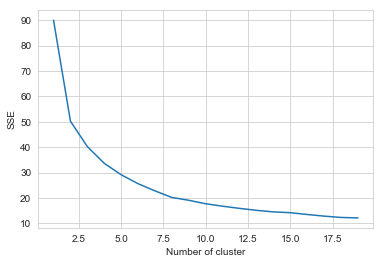

In [131]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 20):
    model = KMeans(n_clusters=k, max_iter=1000).fit(normalized)
    #data["clusters"] = model.labels_
    #print(data["clusters"])
    sse[k] = model.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

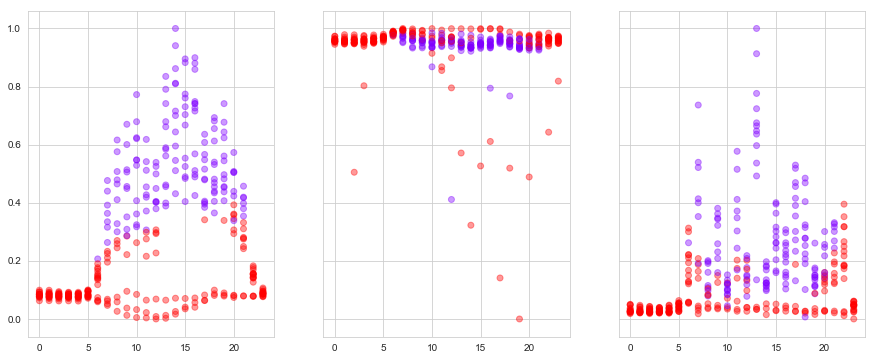

In [134]:

model = KMeans(n_clusters=2)
model.fit(normalized)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(15,6))
ax1.scatter(hour,normalized['pa_mean'],c=model.labels_,cmap='rainbow', alpha=0.4)
ax2.scatter(hour,normalized['fi_a_mean'],c=model.labels_,cmap='rainbow', alpha=0.4)
ax3.scatter(hour,normalized['ampa_real_std'],c=model.labels_,cmap='rainbow', alpha=0.4)